In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import quantile_transform as qt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [2]:
file=pd.read_csv("../../data/mobile_health_score_data.csv").drop('Unnamed: 0',axis=1).dropna()

In [3]:
data=file[file.columns[4:]]

In [4]:
data

% Rural  % households wo car  % workers commuting by public transit  \
0      42.002162             0.056569                                    0.1   
1      42.279099             0.035530                                    0.1   
2      67.789635             0.092373                                    0.3   
3      68.352607             0.059283                                    0.5   
4      89.951502             0.041373                                    0.1   
5      51.374382             0.115259                                    0.0   
6      71.232157             0.073759                                    0.0   
7      33.696826             0.057629                                    0.3   
8      49.148034             0.072221                                    0.2   
9      85.736273             0.040296                                    0.2   
10     86.744724             0.049082                                    0.0   
11    100.000000             0.099213                                    0.0   
12     75.980335             0.099667                                    0.1   
13    100.000000             0.040839                                    0.0   
14    100.000000             0.040014                                    0.0   
15     47.195083             0.060601                                    0.0   
16     43.894687             0.060137                                    0.1   
17     80.949501             0.065522                                    0.2   
18    100.000000             0.043292                                    0.5   
19     69.651794             0.051358                                    0.0   
20    100.000000             0.061963                                    0.5   
21     73.239559             0.041129                                    0.1   
22     50.888540             0.054343                                    0.0   
23     45.638978             0.133742                                    0.0   
24     90.130645             0.054588                                    0.1   
25     54.188366             0.046849                                    0.1   
26     63.511574             0.049675                                    0.0   
27     37.483482             0.062492                                    0.2   
28     80.233165             0.069446                                    0.0   
29     70.366515             0.049163                                    0.2   
...          ...                  ...                                    ...   
3112   83.200302             0.040885                                    0.4   
3113   30.784687             0.038377                                    0.6   
3114    9.860448             0.037644                                    0.6   
3115   64.939897             0.051989                                    0.2   
3116   89.496244             0.052380                                    0.1   
3117   13.431021             0.055634                                    0.8   
3118   36.682765             0.052881                                    0.2   
3119   11.939723             0.047536                                    2.1   
3120  100.000000             0.029458                                    0.0   
3121   29.072464             0.037071                                    2.3   
3122   41.630469             0.033199                                    0.5   
3123   55.360370             0.026110                                    3.6   
3124  100.000000             0.027575                                    1.0   
3125   51.424370             0.045494                                    0.7   
3126   45.995924             0.012575                                    0.1   
3127   31.483791             0.036509                                    0.5   
3128   49.025557             0.091053                                    0.2   
3129   19.784604             0.047884                                    0.5   
3130   82

In [5]:
data.columns

Index(['% Rural', '% households wo car',
       '% workers commuting by public transit', 'Primary Care Physicians Rate',
       '% Without Health Insurance', '% Nonwhite',
       '% Limited English Proficiency',
       '% Veterans in Civilian Adult Population', '% Adults 65 and Older',
       '% disabled', 'opioid death rate', '% Fair or Poor Health',
       'Number of Hospitals'],
      dtype='object')

In [6]:
X_norm1=qt(data, n_quantiles=5, random_state=13, copy=False)



Cluster 2 Inertia 2062.521016629462
Cluster 3 Inertia 1837.0998462764694
Cluster 4 Inertia 1679.7732657811637
Cluster 5 Inertia 1586.00096510268
Cluster 6 Inertia 1520.0698848390139
Cluster 7 Inertia 1465.198246247054


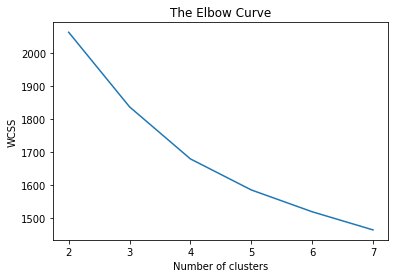

In [7]:
wcss = []  #Within-Cluster-Sum-of-Squares
end=8
for i in range(2,end):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_norm1)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(2,end),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") #
plt.show()

No. Clusters: 2, Silhouette Score: 0.196, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.168, Change from Previous Cluster: -0.028
No. Clusters: 4, Silhouette Score: 0.149, Change from Previous Cluster: -0.019
No. Clusters: 5, Silhouette Score: 0.139, Change from Previous Cluster: -0.01
No. Clusters: 6, Silhouette Score: 0.127, Change from Previous Cluster: -0.012
No. Clusters: 7, Silhouette Score: 0.131, Change from Previous Cluster: 0.004
No. Clusters: 8, Silhouette Score: 0.115, Change from Previous Cluster: -0.016
No. Clusters: 9, Silhouette Score: 0.115, Change from Previous Cluster: 0.0
No. Clusters: 10, Silhouette Score: 0.111, Change from Previous Cluster: -0.004
No. Clusters: 11, Silhouette Score: 0.113, Change from Previous Cluster: 0.002
No. Clusters: 12, Silhouette Score: 0.113, Change from Previous Cluster: 0.0
No. Clusters: 13, Silhouette Score: 0.109, Change from Previous Cluster: -0.004
No. Clusters: 14, Silhouette Score: 0.109, Change from Previ

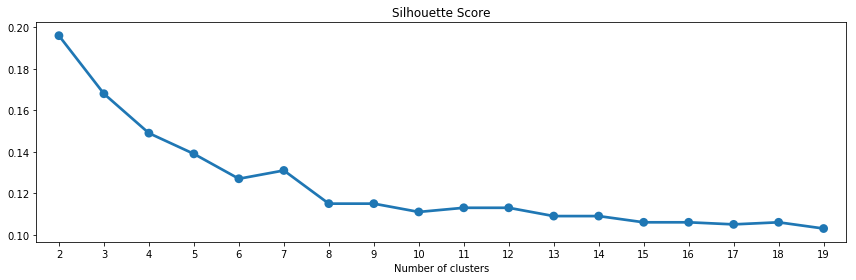

In [8]:
import seaborn as sns
from sklearn.metrics import silhouette_score
n_clu = []
km_ss = []

start=2
end=20
# Create a for loop to find optimal n_clusters
for n_clusters in range(start,end):

    # Create cluster labels
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(X_norm1)

    silhouette_avg = round(silhouette_score(X_norm1, labels, random_state=1), 3)

    # Append score to lists
    km_ss.append(silhouette_avg)
    n_clu.append(n_clusters)

    print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
        n_clusters, silhouette_avg, (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

    # Plot graph at the end of loop
    if n_clusters == end - 1:
        plt.figure(figsize=(12,4))

        plt.title('Silhouette Score')
        plt.xlabel("Number of clusters")
        sns.pointplot(x=n_clu, y=km_ss)
        plt.tight_layout()
        plt.show()

## BIC score with a Gaussian Mixture Model

In [9]:


gm_bic= []
gm_score=[]
for i in range(2,15):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X_norm1)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_norm1)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_norm1)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_norm1))
    gm_score.append(gm.score(X_norm1))

BIC for number of cluster(s) 2: -13660.551647367547
Log-likelihood score for number of cluster(s) 2: 2.4424517057897366
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -15783.409662705795
Log-likelihood score for number of cluster(s) 3: 2.914968284552838
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -24714.342913925437
Log-likelihood score for number of cluster(s) 4: 4.471228135503363
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -27901.767705737104
Log-likelihood score for number of cluster(s) 5: 5.113207747770671
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -41069.22237000337
Log-likelihood score for number of cluster(s) 6: 7.343858145210631
-

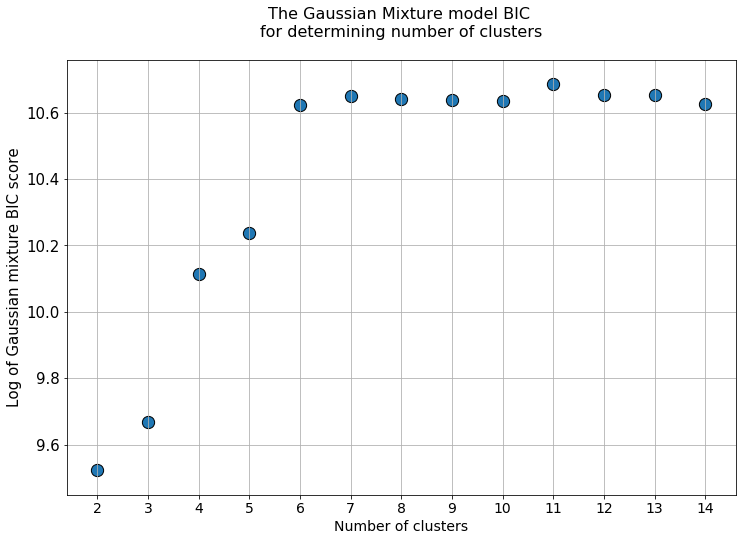

In [10]:
plt.figure(figsize=(12,8))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()


In [11]:
new_data=pd.DataFrame(data=X_norm1,columns=data.columns.tolist())

In [12]:
from sklearn.metrics import davies_bouldin_score
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data)
    labels = kmeans.labels_
    score=davies_bouldin_score(data, labels)
    print("Cluster", i, "Davis Score", score)

Cluster 2 Davis Score 1.81309430634202
Cluster 3 Davis Score 1.9723630240727197
Cluster 4 Davis Score 1.8444212315941697
Cluster 5 Davis Score 1.956230195937469
Cluster 6 Davis Score 2.009258982697539
Cluster 7 Davis Score 2.0388432839439523
Cluster 8 Davis Score 2.081539263833525
Cluster 9 Davis Score 2.062762963140673


In [23]:
model=  KMeans(
               n_clusters=2,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           )
model.fit(new_data)
label=pd.DataFrame(model.labels_)

In [24]:
new_data['class']=label

In [25]:
new_data['class'].value_counts()

1    1999
0    1142
Name: class, dtype: int64

In [26]:
new_data['class']

0       1
1       0
2       1
3       1
4       1
5       1
6       1
7       0
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      0
28      1
29      1
       ..
3111    1
3112    0
3113    0
3114    1
3115    1
3116    0
3117    0
3118    0
3119    1
3120    0
3121    0
3122    1
3123    1
3124    0
3125    1
3126    1
3127    1
3128    0
3129    0
3130    0
3131    1
3132    0
3133    1
3134    0
3135    1
3136    0
3137    0
3138    0
3139    1
3140    1
Name: class, Length: 3141, dtype: int32

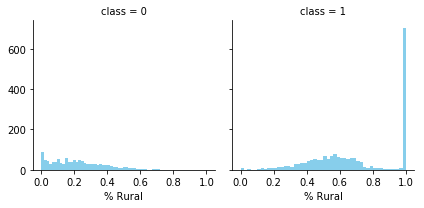

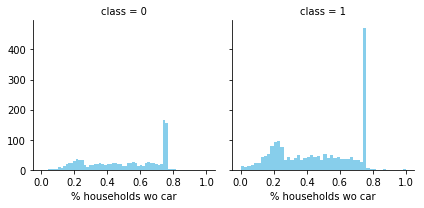

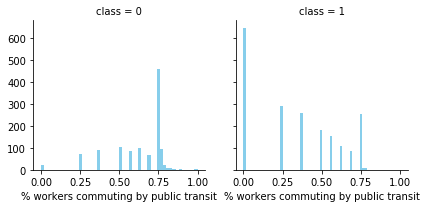

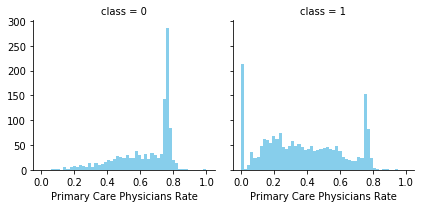

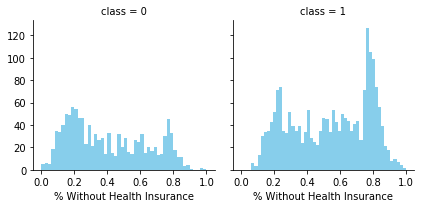

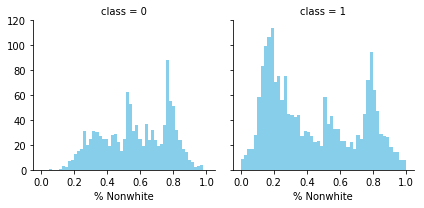

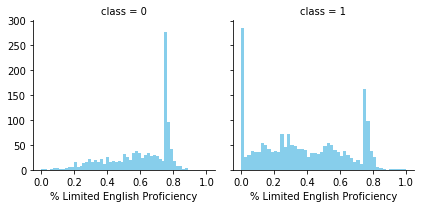

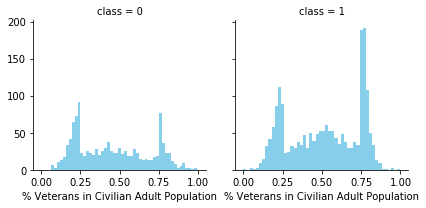

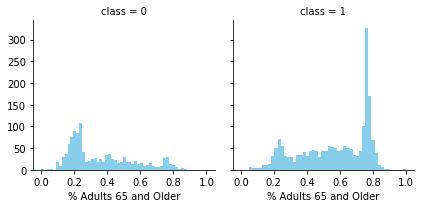

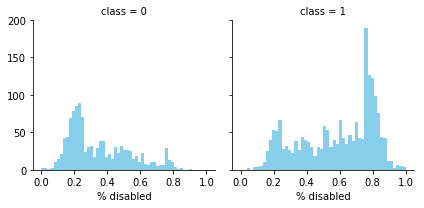

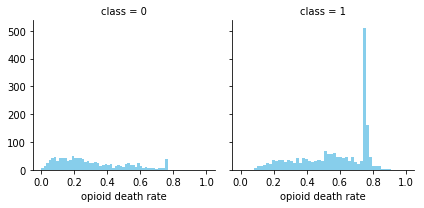

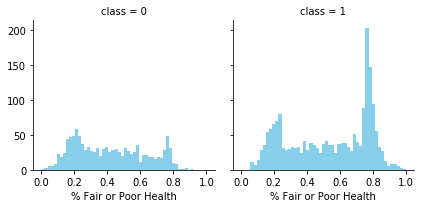

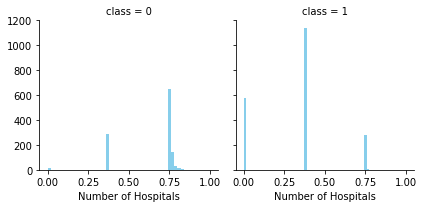

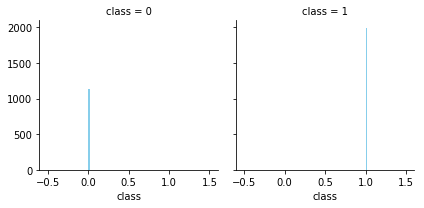

In [27]:
for features in new_data:
    grid= sns.FacetGrid(new_data, col='class')
    color='red' if features=="Deaths" else 'skyblue'
    grid.map(plt.hist, features,bins=50,color=color)

In [28]:
from sklearn.metrics import classification_report as clf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data[new_data.columns[:-1]],new_data['class'], test_size=0.33, random_state=42)

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
test_model=ExtraTreesClassifier()

test_model.fit(X_train,y_train)

y_pred = test_model.predict(X_test)
print(clf(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       379
           1       0.95      0.99      0.97       658

    accuracy                           0.96      1037
   macro avg       0.97      0.95      0.96      1037
weighted avg       0.96      0.96      0.96      1037



In [35]:
feature_importance = test_model.feature_importances_
  

feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        test_model.estimators_],
                                        axis = 0)

In [36]:
Feature_score=(sorted(zip(feature_importance_normalized, X_train.columns), reverse=True))[:10]

top_ten_columns=[]
for val in Feature_score:
    top_ten_columns.append(val[1])

In [37]:
columns=top_ten_columns

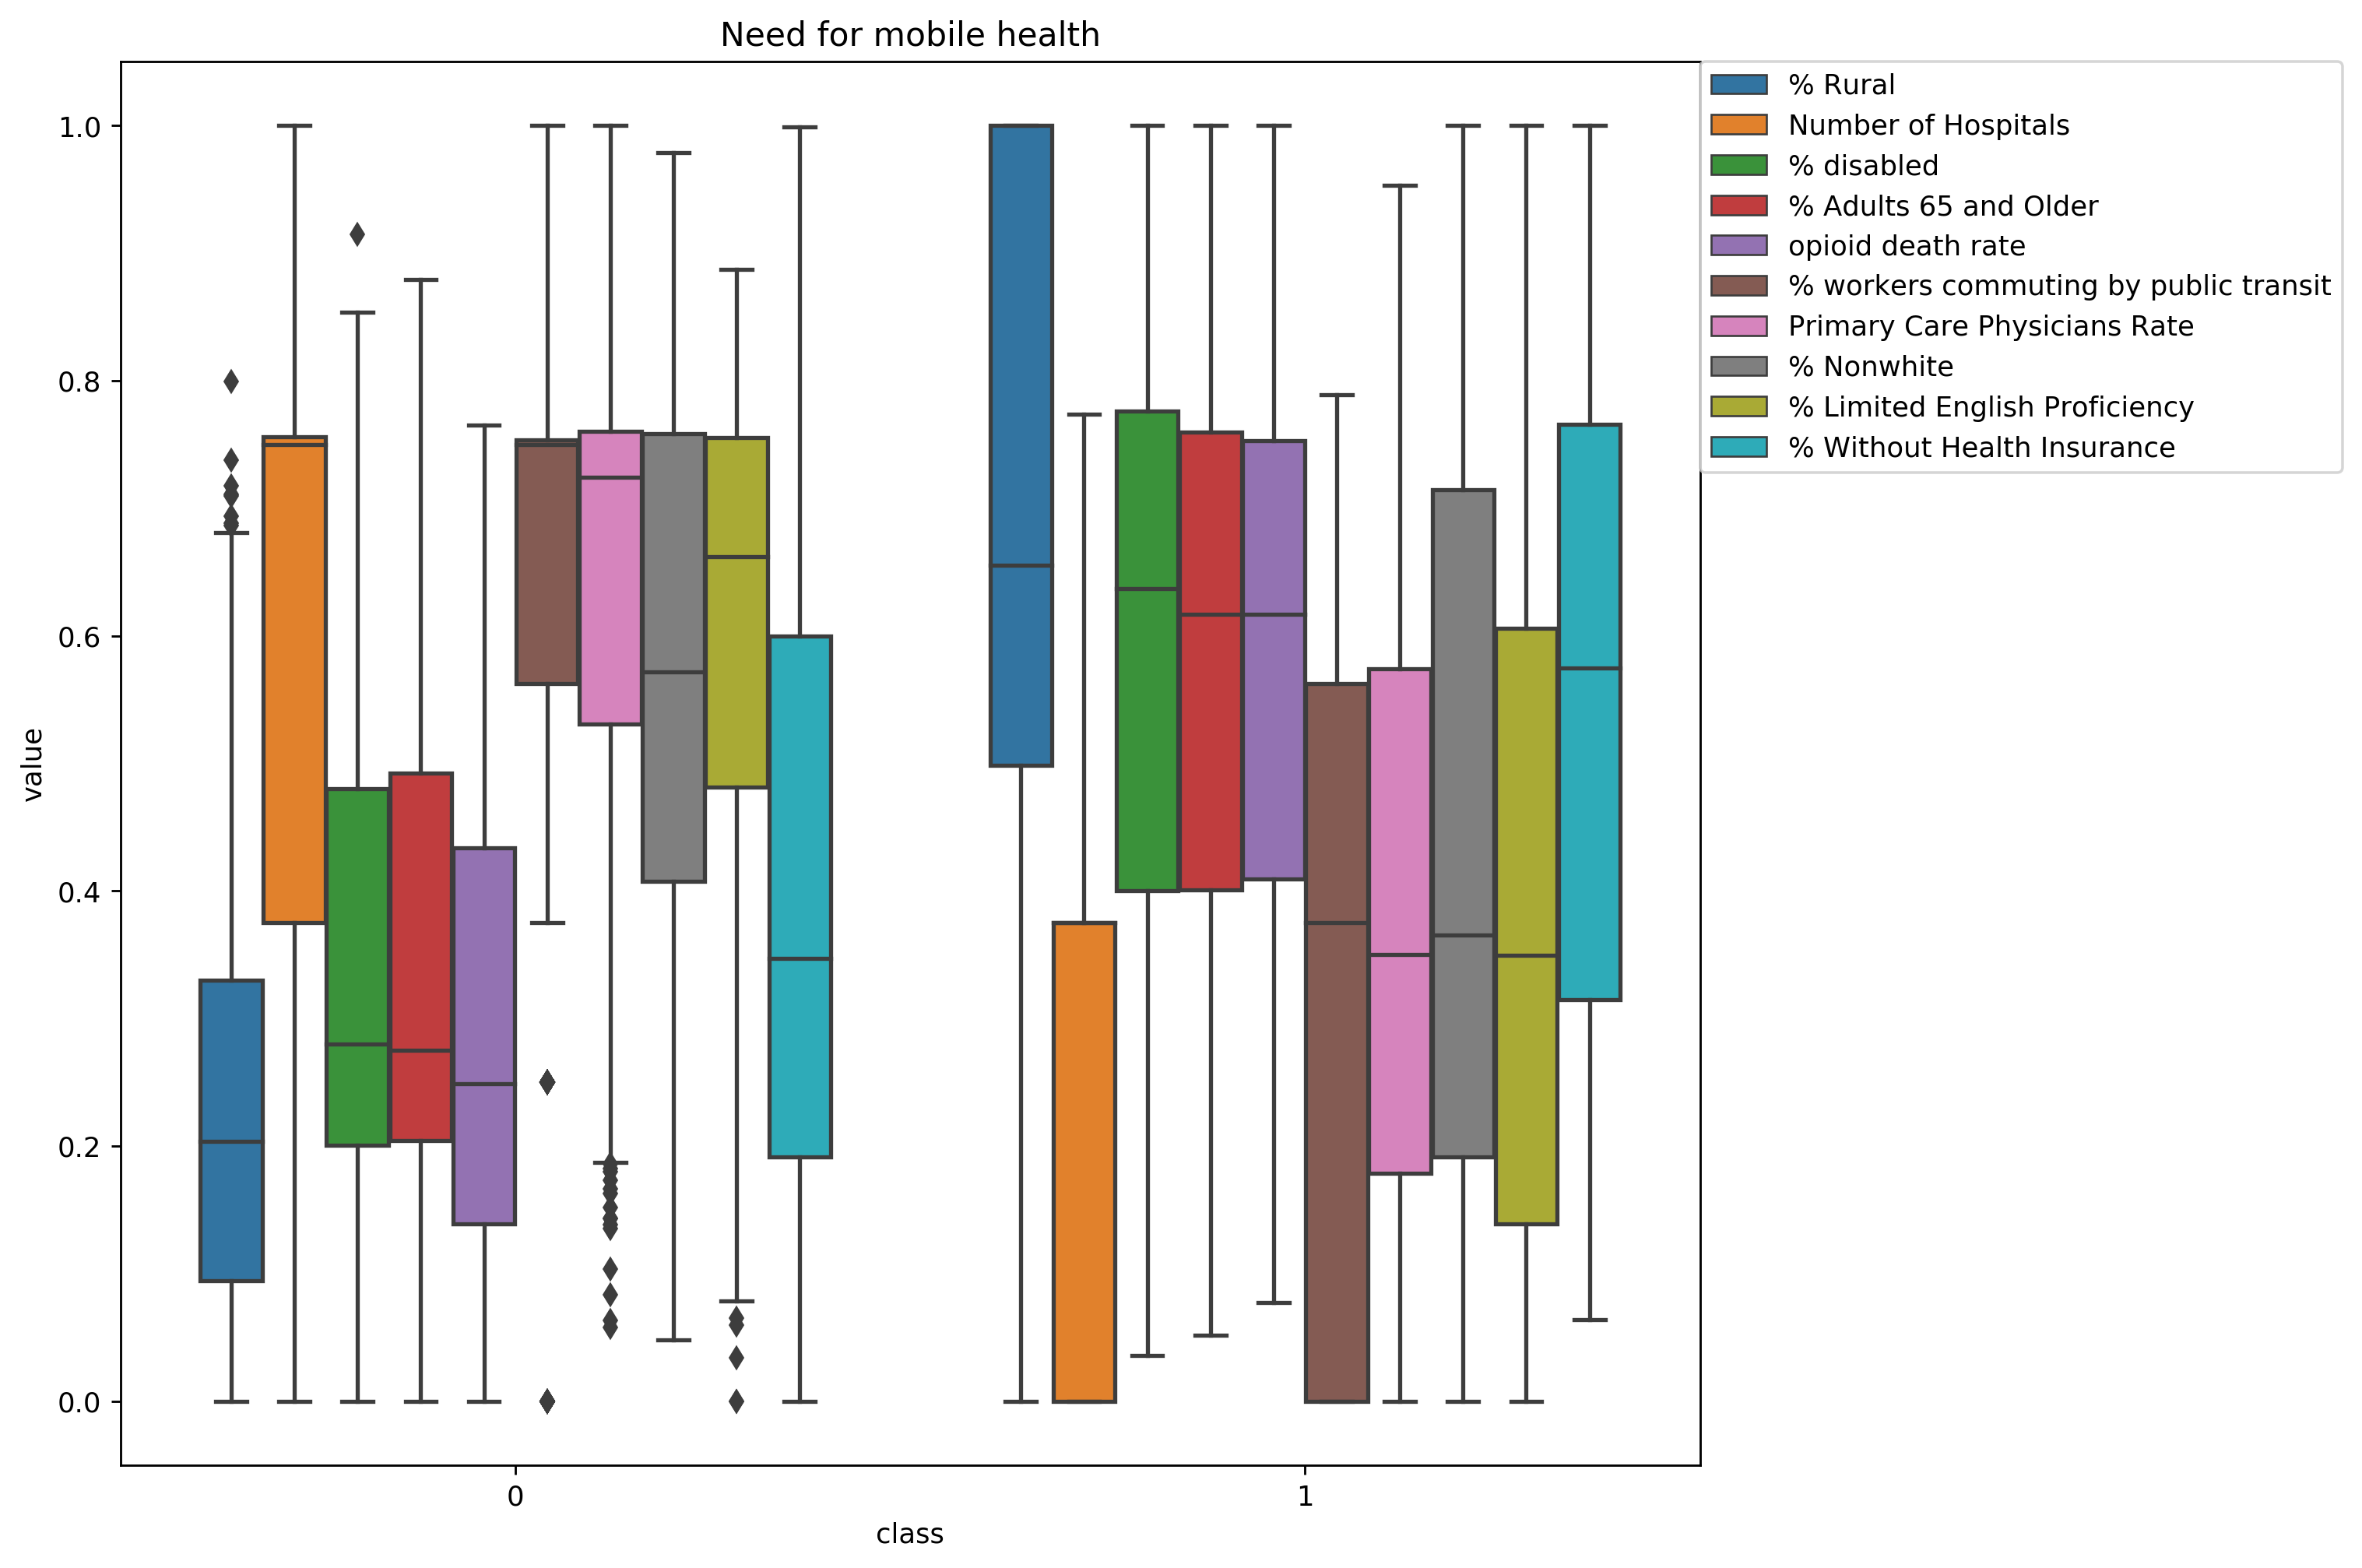

In [55]:
import seaborn as sns
import seaborn as sns


plt.figure(frameon=False,figsize=(12,8),dpi=255)
dd=pd.melt(new_data,id_vars=['class'],value_vars=columns,var_name='boxplot',)
sns.boxplot(x='class',y='value',data=dd,hue='boxplot',)
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0,)
plt.title("Need for mobile health")
plt.tight_layout()

In [32]:
# from yellowbrick.cluster import SilhouetteVisualizer


# for i in range(2,6):
#     plt.figure(figsize=(6,10))
#     plt.title(str(i)+" Clusters")
#     km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
#     visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
#     visualizer.fit(X_train)


In [33]:
# from yellowbrick.features import manifold_embedding
# visualizer = manifold_embedding(X_test, y_test)

### Merging Score column and class

In [39]:
file['class']=new_data['class']

In [40]:
class_0=file[file['class']==0]
class_1=file[file['class']==1]


In [42]:
class_0.columns

Index(['FIPS', 'State', 'County', 'Need for Mobile Health Resources',
       '% Rural', '% households wo car',
       '% workers commuting by public transit', 'Primary Care Physicians Rate',
       '% Without Health Insurance', '% Nonwhite',
       '% Limited English Proficiency',
       '% Veterans in Civilian Adult Population', '% Adults 65 and Older',
       '% disabled', 'opioid death rate', '% Fair or Poor Health',
       'Number of Hospitals', 'class'],
      dtype='object')

In [43]:
# State count in dataset

state_count=file['State'].value_counts().to_dict()


In [44]:
cluster1_states=class_0['State'].value_counts()[:5].to_dict()
cluster2_states=class_1['State'].value_counts()[:5].to_dict()


In [45]:
for val in cluster1_states:
    cluster1_states[val]=cluster1_states.get(val)/state_count.get(val)*100
for val in cluster2_states:
    cluster2_states[val]=cluster2_states.get(val)/state_count.get(val)*100


#### Cluster 1

In [46]:
cluster1_states

{'Texas': 24.50592885375494,
 'New York': 80.0,
 'Ohio': 57.95454545454546,
 'California': 84.48275862068965,
 'Virginia': 36.09022556390977}

<BarContainer object of 5 artists>

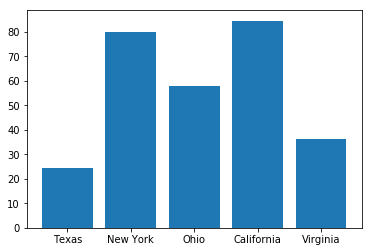

In [47]:
keys = cluster1_states.keys()
values = cluster1_states.values()

plt.bar(keys, values)

#### Cluster 2

In [48]:
cluster2_states

{'Texas': 75.49407114624506,
 'Georgia': 73.58490566037736,
 'Kentucky': 79.16666666666666,
 'Missouri': 79.13043478260869,
 'Virginia': 63.90977443609023}

<BarContainer object of 5 artists>

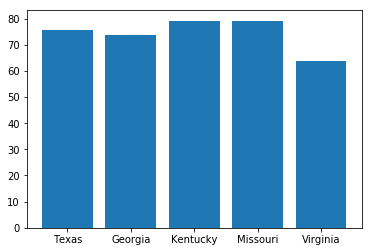

In [49]:
keys = cluster2_states.keys()
values = cluster2_states.values()

plt.bar(keys, values)

In [50]:
class_1['State'].value_counts()[:5]

Texas       191
Georgia     117
Kentucky     95
Missouri     91
Virginia     85
Name: State, dtype: int64

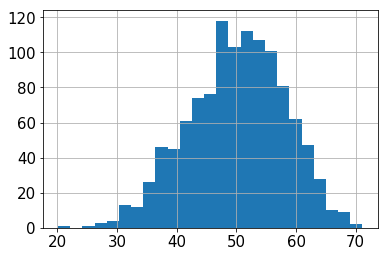

In [53]:
class_0['Need for Mobile Health Resources'].hist(xlabelsize=15,ylabelsize=15,bins=25)

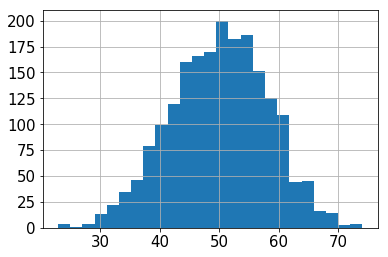

In [54]:
class_1['Need for Mobile Health Resources'].hist(xlabelsize=15,ylabelsize=15,bins=25)

## Intercluster Distance Maps
Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space. The clusters are sized according to a scoring metric. By default, they are sized by membership,<br><br> e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters. Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.

## PCA Plot

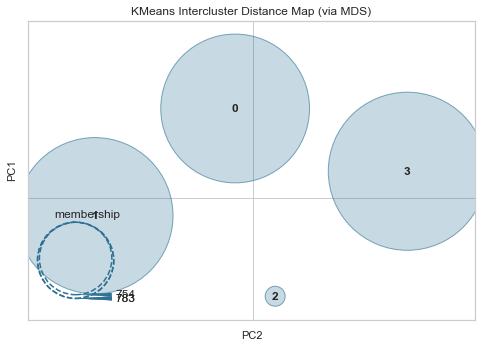

In [30]:
from yellowbrick.cluster import intercluster_distance



visualizer = intercluster_distance(
                KMeans(
               n_clusters=4,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42),
               X_norm1)

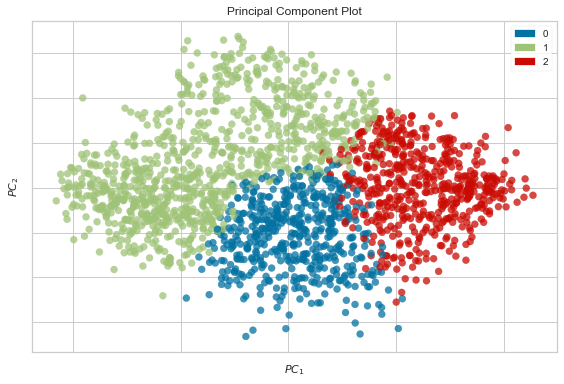

In [28]:
from yellowbrick.features import pca_decomposition
visualizer = pca_decomposition(X_train,y_train)

In [57]:
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [58]:
slc =  {}
for k in range(2, 10):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X_norm1)
    if k == 2: labels = kmeans.labels_
    clusters = kmeans.labels_
#     sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
#     db[k] = davies_bouldin_score(X,clusters)
    slc[k] = silhouette_score(X_norm1,clusters)

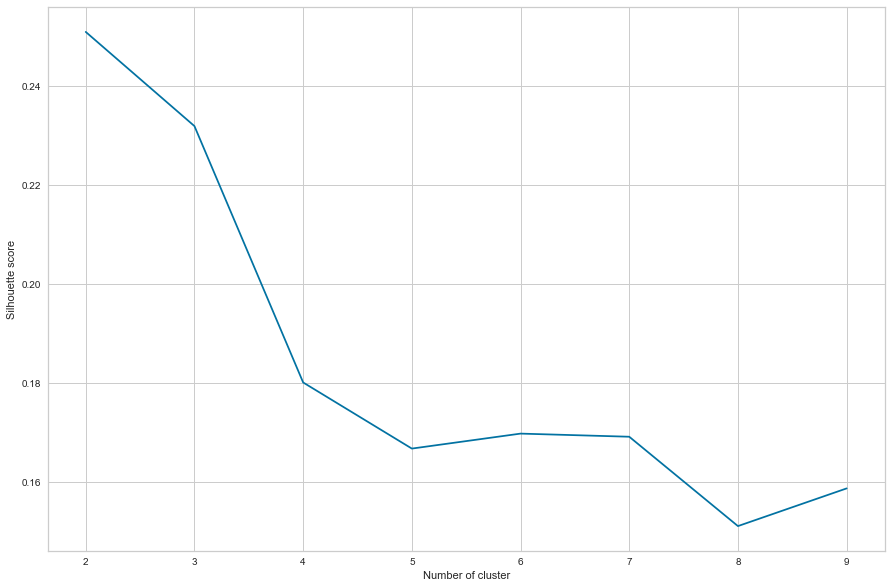

In [59]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2509884980346135
For n_clusters = 3 The average silhouette_score is : 0.23196706063616326
For n_clusters = 4 The average silhouette_score is : 0.18018667806604835
For n_clusters = 5 The average silhouette_score is : 0.16683571690128027
For n_clusters = 6 The average silhouette_score is : 0.16985913612916653
For n_clusters = 7 The average silhouette_score is : 0.1692275601676119
For n_clusters = 8 The average silhouette_score is : 0.1511805327439586
For n_clusters = 9 The average silhouette_score is : 0.1587938196174912


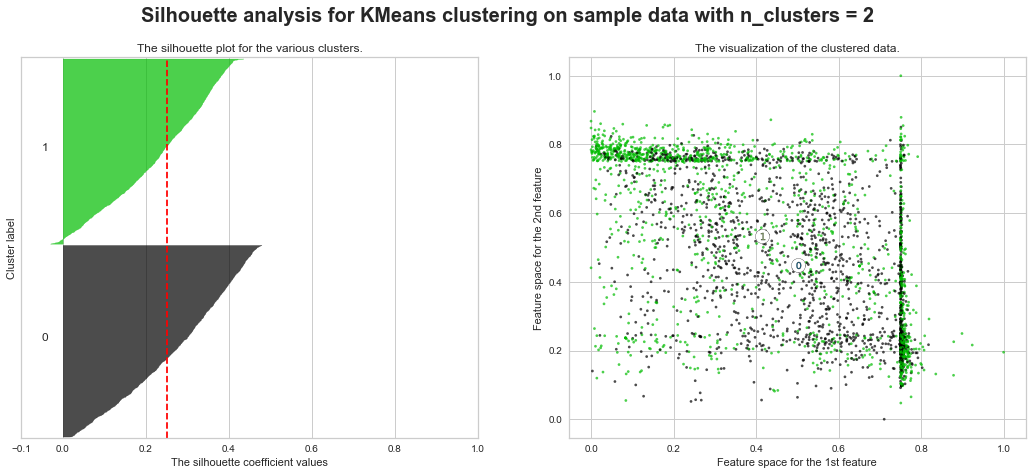

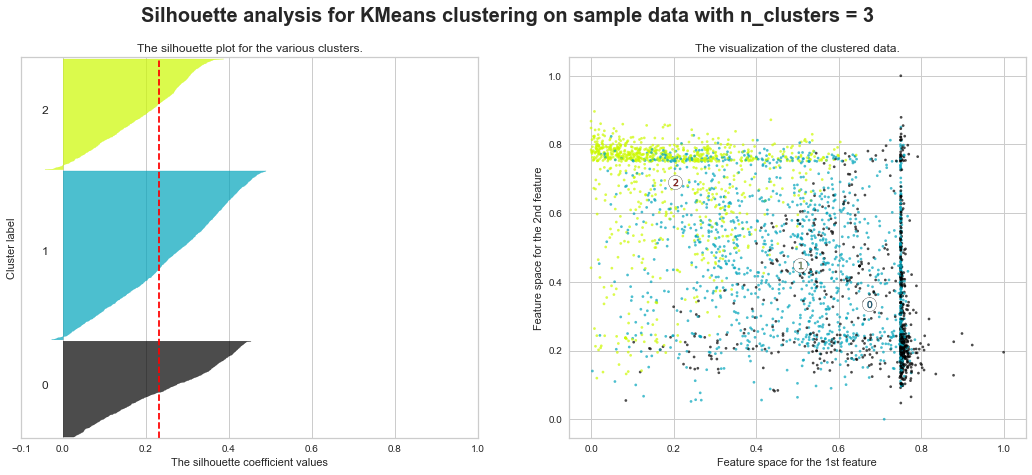

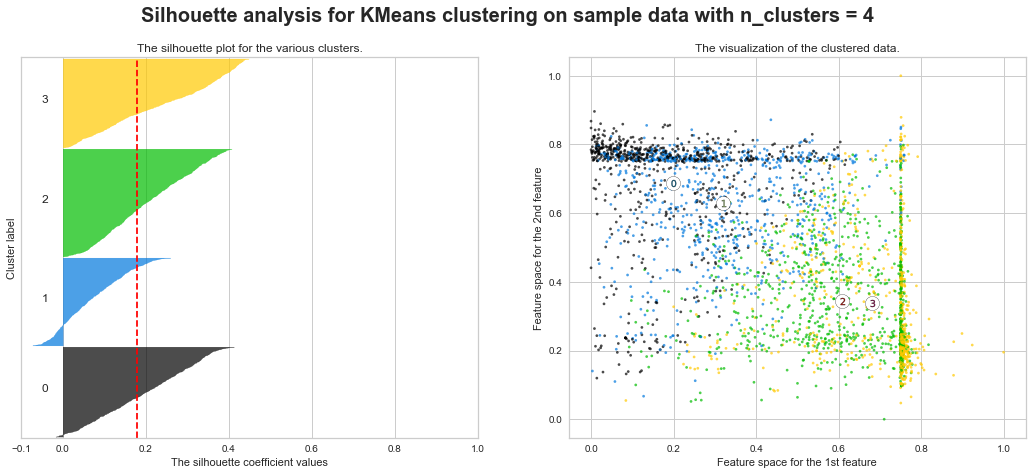

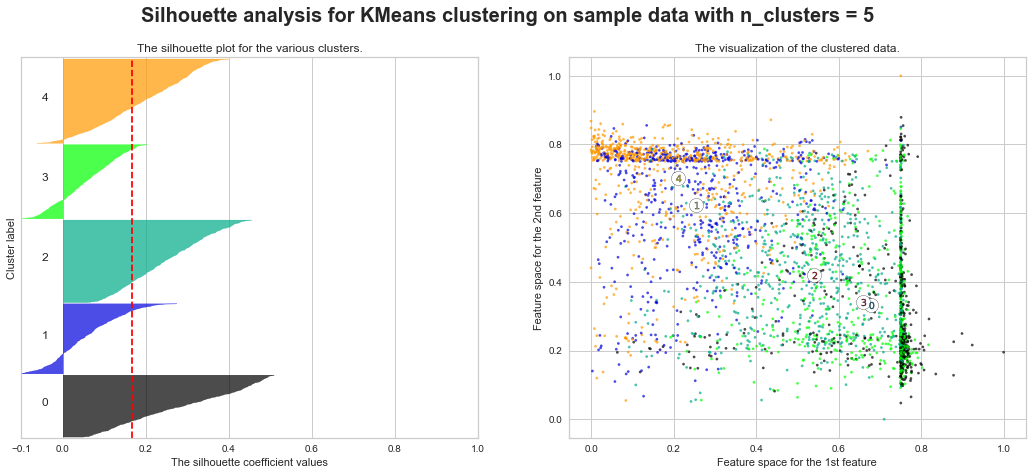

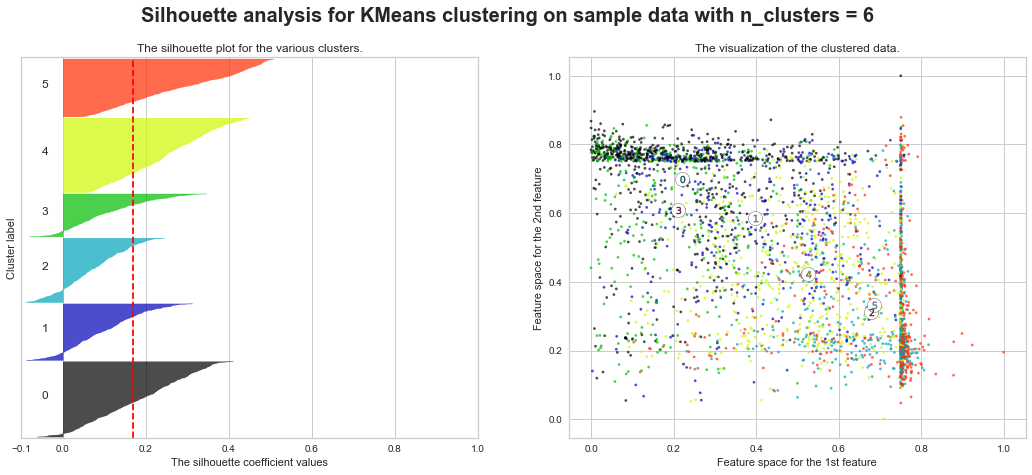

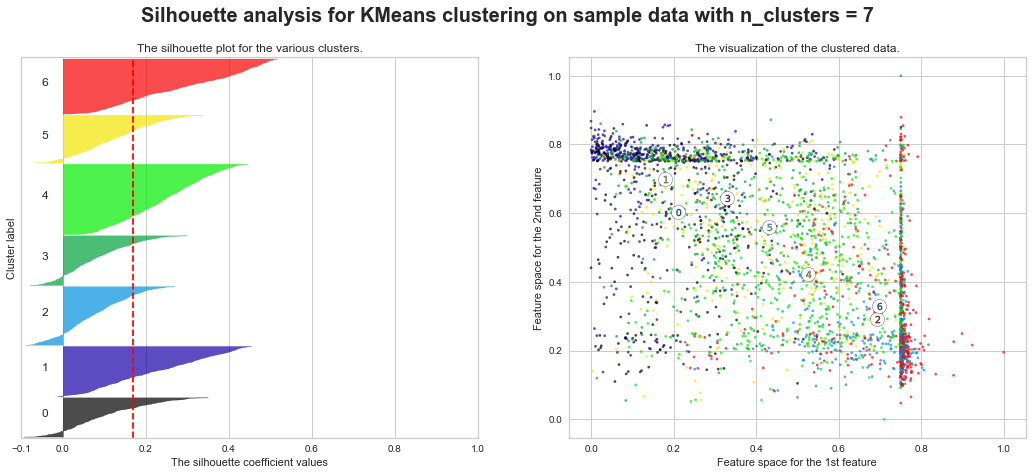

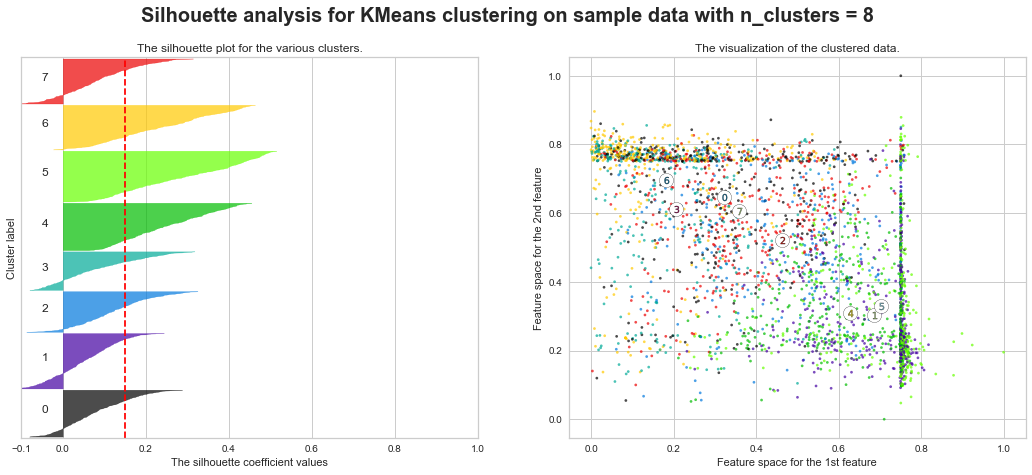

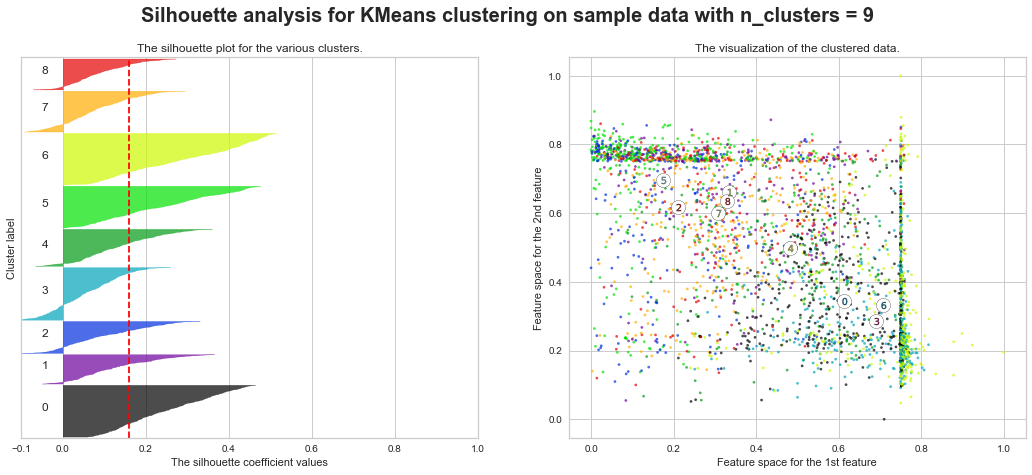

In [60]:
for n_clusters in range(2, 10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_norm1) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X_norm1)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_norm1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_norm1, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_norm1[:, 0], X_norm1[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=20, fontweight='bold')

plt.show()